# Ultimate Inc. Take-Home Challange

# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


In [195]:
% matplotlib inline
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [196]:
login = pd.read_json('logins.json')

In [197]:
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [198]:
#To use the resample function, DatetimeIndex, TimedeltaIndex or PeriodIndex is needed


In [199]:
login = pd.Series(login, index=login.login_time)

In [200]:
quarter = login.resample('15T').count()
hourly = login.resample('60T').count()
daily =  login.resample('D').count()
weekly = login.resample('W').count()
monthly =  login.resample('M').count()


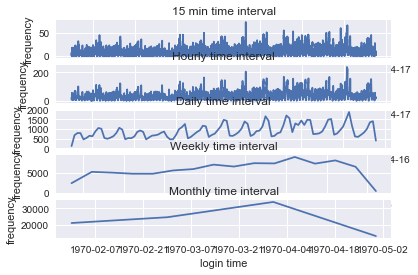

In [201]:
plt.subplot(5,1,1)
plt.plot(quarter)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('15 min time interval')


plt.subplot(5,1,2)
plt.plot(hourly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Hourly time interval')


plt.subplot(5,1,3)
plt.plot(daily)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Daily time interval')

plt.subplot(5,1,4)
plt.plot(weekly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Weekly time interval')



plt.subplot(5,1,5)
plt.plot(monthly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Monthly time interval')
#plt.tight_layout()

In [191]:
#hourly

# Login Time Trend
The hourly frequency of logins is less than 50 except couple instances.  Login frequency usually increases after 22:00 till early morning. It also makes a peak around 11:00 am, then gradually decreases. Early mornings are the time with least number of logins. 
Till late March, monthly usage increases then decreases sharply. 

# Part 2 - Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

# Part 2 - Comment
The experiment should be aimed to measure drivers trip behaviour after reimbursing toll costs.Key measure would be the number of trips serviced by a driver from the other city (the number of partner drivers). If there are enough data points,eg. data of 30 or more drivers trip behaviour before and after reimbursing toll costs, a paired t-test can be conducted. 
If conducting a paired test is not possible, we can check how the reimbursement affect the mean number of trips. To do this, the two sample t-test can be conducted with the null hypothesis the mean number of trips are equal. Here the first sample is the number of trips before the reimbursement and the second sample is trips after the reimbursement. 


# Part 3 - Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json.
Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

# Part 3
The decision tree and logistic regression are good candidates for this model due to their interpretability and robustness. 

In [54]:
data = pd.DataFrame(json.load((open('ultimate_data_challenge.json'))))

In [55]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [61]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [62]:
data['signup_date'] = pd.to_datetime(data['signup_date'])


In [63]:
np.isnan(data.trips_in_first_30_days).value_counts()


False    50000
Name: trips_in_first_30_days, dtype: int64

In [73]:
np.isnan(data.avg_rating_by_driver).value_counts()


False    49799
True       201
Name: avg_rating_by_driver, dtype: int64

In [74]:
np.isnan(data.avg_rating_of_driver).value_counts()


False    41878
True      8122
Name: avg_rating_of_driver, dtype: int64

In [79]:
data.avg_rating_by_driver.fillna(data.avg_rating_by_driver.mean(), inplace=True)
data.avg_rating_of_driver.fillna(data.avg_rating_of_driver.mean(), inplace=True)


In [95]:
data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [96]:
data['phone'].fillna('iPhone', inplace=True) #since most users are using Iphone

In [97]:
data.info() #no more missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [98]:
data.last_trip_date.sort_values().tail()

45126   2014-07-01
38651   2014-07-01
14473   2014-07-01
22735   2014-07-01
45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [99]:
# The last day data was taken July 1st, 2014. It is given that a user retained 
#if they were “active” (i.e. took a trip) in the preceding 30 days. Thus any users whose last trip was after June 1st, 2014 
#is assumed 'active' or retained'. 

data.loc[data['last_trip_date'] >= '2014-06-01', 'active'] = 1
data.loc[data['last_trip_date'] < '2014-06-01', 'active'] = 0

data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [105]:
active_users = data.active.mean()
print("The proportion of active users in the last 30 days: " + str(active_users))

The proportion of active users in the last 30 days: 0.37608


In [106]:
# last_trip_date is used to calculate the feature 'active'. Thus, it can not be used for analysis.
data.drop('last_trip_date', axis=1, inplace=True)

In [113]:
#Check if there are any highly correlated features
correlation = data.corr()
correlation


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
avg_dist,1.000000,0.079793,0.028508,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.092780
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.019964,-0.039097,0.009328,0.020366,-0.026748
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,-0.003290,-0.011060,-0.001916,0.012587,-0.010829
avg_surge,-0.081491,0.010498,-0.021653,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.003333
surge_pct,-0.104414,0.019964,-0.003290,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.011797
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,0.005720,1.000000,0.112210,0.050388,0.210463
ultimate_black_user,0.032310,0.009328,-0.001916,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.205002
weekday_pct,0.101652,0.020366,0.012587,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.009693
active,-0.092780,-0.026748,-0.010829,-0.003333,0.011797,0.210463,0.205002,0.009693,1.000000


avg_surge and surge_pct are highly correlated (0.79) with each other, so one of them can be dropped. 

In [115]:
data.drop('surge_pct', axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A77DD945C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A779F83940>]], dtype=object)

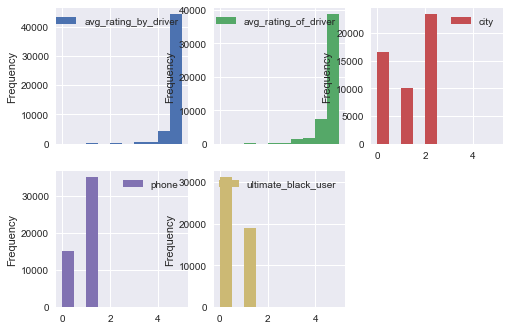

In [194]:
data[['avg_rating_by_driver', 'avg_rating_of_driver', 'city', 'phone', 'ultimate_black_user']].\
plot(kind='hist', subplots=True, layout=(2,3), legend=True)


In [118]:
# Categorical features should be replaced with dummy variables for analysis
from sklearn.preprocessing import LabelEncoder

df = data
encoder = LabelEncoder()
df['city'] = encoder.fit_transform(data['city'])
df['phone']= encoder.fit_transform(data['phone'])
df['ultimate_black_user']= encoder.fit_transform(data['ultimate_black_user'])
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,1,1,2014-01-25,4,1,46.2,1
1,8.26,5.0,5.0,1.00,0,0,2014-01-29,0,0,50.0,0
2,0.77,5.0,4.3,1.00,0,1,2014-01-06,3,0,100.0,0
3,2.36,4.9,4.6,1.14,1,1,2014-01-10,9,1,80.0,1
4,3.13,4.9,4.4,1.19,2,0,2014-01-27,14,0,82.4,0


In [132]:
df = df.drop(['signup_date'],axis = 1) #No timestamp features for Decision Trees

In [133]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [134]:
# Split into train and test sets
x =df.drop(['active'], axis=1)
y = df['active']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

print ('Train shape: '+ str(x_train.shape)+str(y_train.shape))
print ('Test shape: ' +str(x_test.shape)+str( y_test.shape))



Train shape: (40000, 9)(40000,)
Test shape: (10000, 9)(10000,)


In [181]:
#Decision Tree Classifier with criterion gini index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [182]:
#Prediction for Decision Tree classifier with criterion as gini index
y_pred = clf_gini.predict(x_test)


In [183]:
features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge', 'city' ,'phone', 
            'trips_in_first_30_days', 'ultimate_black_user','weekday_pct' ]

In [184]:
gini_importances = clf_gini.feature_importances_
indices = np.argsort(gini_importances)[::-1]


# Print the feature ranking
print("Feature ranking:")


for i, val in enumerate(clf_gini.feature_importances_):
    print("{:20}{:3f}".format(features[i], val))

Feature ranking:
avg_dist            0.000000
avg_rating_by_driver0.508460
avg_rating_of_driver0.000227
avg_surge           0.077146
city                0.202874
phone               0.128414
trips_in_first_30_days0.021019
ultimate_black_user 0.052540
weekday_pct         0.009321


The most important features with respect to gini_index are: avg_rating_by_driver,city, phone followed by avg_surge and ultimate_black_users. This model provides about 74% accuracy and it performs well to determine whether a user is retained or not (eg.confusion matrix). 

In [185]:
print('Confusion matrix for Decision Tree Classifier with criterion gini index')
print(confusion_matrix(y_test, y_pred))

print('Test accuracy: '+str(accuracy_score(y_test, y_pred)))


Confusion matrix for Decision Tree Classifier with criterion gini index
[[5467  772]
 [1813 1948]]
Test accuracy: 0.7415


In [186]:
#Decision Tree Classifier with criterion information gain
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [187]:
#Prediction for Decision Tree classifier with criterion as information gain
y_pred_en = clf_entropy.predict(x_test)


In [188]:
en_importances = clf_entropy.feature_importances_
indices_en = np.argsort(en_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_en[f], en_importances[indices[f]]))

Feature ranking:
1. feature 1 (0.700274)
2. feature 5 (0.091865)
3. feature 4 (0.207860)
4. feature 8 (0.000000)
5. feature 7 (0.000000)
6. feature 6 (0.000000)
7. feature 3 (0.000000)
8. feature 2 (0.000000)
9. feature 0 (0.000000)


In [189]:
print('Confusion matrix for Decision Tree Classifier with criterion information gain')
print(confusion_matrix(y_test, y_pred_en))

print('Test accuracy: '+str(accuracy_score(y_test, y_pred_en)))


Confusion matrix for Decision Tree Classifier with criterion information gain
[[5359  880]
 [1854 1907]]
Test accuracy: 0.7266


In [190]:
#Logistic Regression
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)
y_pred_log = clf_log.predict(x_test)

print('Confusion matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_log))

print('Test accuracy: '+str(accuracy_score(y_test, y_pred_log)))


Confusion matrix for Logistic Regression
[[5409  830]
 [2166 1595]]
Test accuracy: 0.7004


# Conclusion
Decision Tree Classifier provides about 73% accuracy and perform better than Logistic Regression. The average rating by driver and city are the most important feature to determine whether a driver is active or not. These two feature is followed by the type phone (iPhone or Android). This shows that iPhone users are more active. It would be beneficial to search why Android users are less active (maybe Android app has some  quality issues or harder to use). It would be also beneficial to increase marketing for Android users to motive them to be more active. 
Another recommendation is to motive drivers via promotions or discount so that they are more active in the first 30 days after signing-up.